In [56]:
import sys
from tensorflow import keras
from matplotlib import pyplot
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
import pandas as pd

In [57]:
def NetA():
  model=keras.Sequential([keras.layers.Flatten(),keras.layers.Dense(10,activation=tf.nn.softmax)])
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [58]:
def NetB():
  model=keras.Sequential([keras.layers.Flatten(),keras.layers.Dense(300,activation='relu'),keras.layers.Dense(10,activation='softmax')])
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [59]:
def NetC():
  model=keras.Sequential([tf.keras.layers.Conv2D(32, (5,25),input_shape=(32,32,3), activation='relu'),
                          MaxPooling2D(pool_size=(2, 2)),keras.layers.Flatten(),
                          keras.layers.Dense(10,activation='softmax')])
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [60]:
def load_dataset():
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [61]:
def preperations(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm

In [62]:
def summarize(history,i):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f'model accuracy, model : {i+1}')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(f'model loss, model: {i+1}')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [63]:
def run_test():
  trainX, trainY, testX, testY = load_dataset()
  trainX, testX = preperations(trainX, testX)
  modellist=[NetA(),NetB(),NetC()]
  for i in range(len(modellist)):
    print(f"\n Model -> {i+1} \n")
    model = modellist[i]
    print(f"Training Model {i+1}")
    history = model.fit(trainX, trainY, epochs=50,validation_data=(testX, testY), verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('Ans -> > %.3f' % (acc * 100.0))
    summarize(history,i)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)



 Model -> 1 

Training Model 1
Ans -> > 38.370


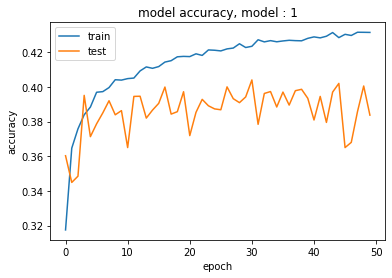

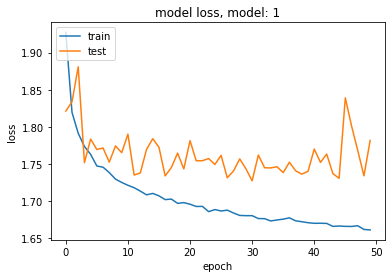


 Model -> 2 

Training Model 2
Ans -> > 53.310


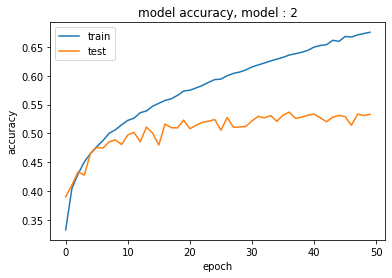

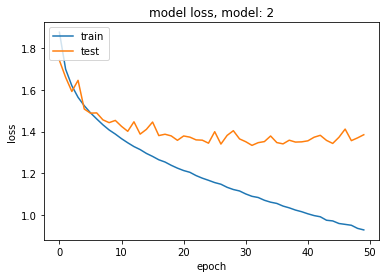


 Model -> 3 

Training Model 3
Ans -> > 60.160


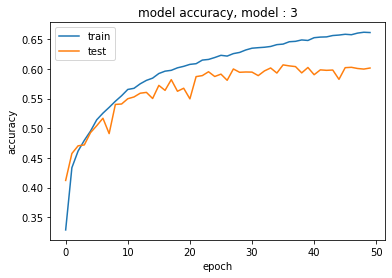

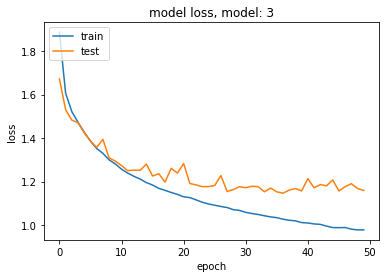

In [64]:
run_test()